<ipython-input-119-94cbb5bd0a29>:48: UserWarning: This figure includes Axes that are not compatible with tight_layout, so results might be incorrect.
  plt.tight_layout()


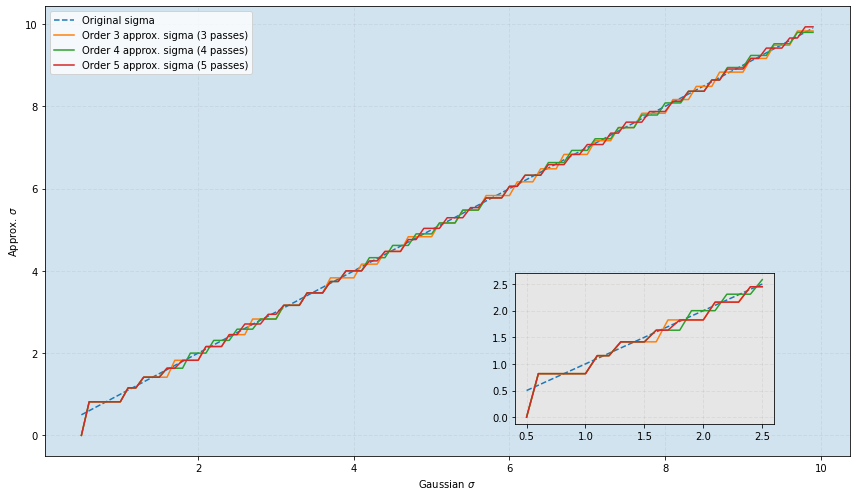

In [119]:
import numpy as np

def sigma_to_box_radius(sigma, n):  
    wi = np.sqrt((12*sigma*sigma/n)+1)
    wl = np.floor(wi)  
    if wl%2==0:
        wl=wl-1
    wu = wl+2
                
    mi = (12*sigma*sigma - n*wl*wl - 4*n*wl - 3*n)/(-4*wl - 4)
    m = np.round(mi)

    return np.sqrt((m*wl*wl+(n-m)*wu*wu-n)/12.0)

siga3 = []
siga4 = []
siga5 = []
sig = np.arange(0.5,10,0.1)
for s in sig:
    siga3.append(sigma_to_box_radius(s, 3))
    siga4.append(sigma_to_box_radius(s, 4))
    siga5.append(sigma_to_box_radius(s, 5))

import matplotlib.pyplot as plt

#with plt.style.context("seaborn-dark"):
plt.figure(figsize=(12,7))
plt.plot(sig, sig, label = "Original sigma", linestyle='--')
plt.plot(sig, siga3, label = "Order 3 approx. sigma (3 passes)")
plt.plot(sig, siga4, label = "Order 4 approx. sigma (4 passes)")
plt.plot(sig, siga5, label = "Order 5 approx. sigma (5 passes)")
plt.legend(frameon=True)
#plt.grid()
plt.grid(True, which="both", color='black', linestyle='--', linewidth=1, alpha=0.05)
ax= plt.gca()
ax.patch.set_alpha(0.2)
ax.patch.set_facecolor("tab:blue")
plt.xlabel(r'Gaussian $\sigma$')
plt.ylabel(r'Approx. $\sigma$')

sub_axes = plt.axes([0.6, 0.15, 0.30, 0.30], frameon=True,facecolor=[0.9,0.9,0.9,1], alpha=0) 
sub_axes.plot(sig[:21], sig[:21], linestyle='--') 
sub_axes.plot(sig[:21], siga3[:21]) 
sub_axes.plot(sig[:21], siga4[:21]) 
sub_axes.plot(sig[:21], siga5[:21]) 
sub_axes.grid(True, which="both", color='black', linestyle='--', linewidth=1, alpha=0.05)

plt.tight_layout()
plt.savefig("sigma.pdf")
plt.savefig("sigma.png", facecolor="white", dpi=300)
plt.show()